### Analytical Questions
1. Average GPA by Class: What is the average GPA for each class?
2. Gender Performance Comparison: How do male and female students compare
in terms of average GPA?
3. Race Performance Analysis: What is the average GPA for students of different
races?
4. Course Performance: How do students perform in different courses (Algebra,
Calculus1, Calculus2, Statistics, Probability, Measure, Functional_analysis)?
5. Correlation with GPA: What is the correlation between GPA and performance in
individual courses?
6. Performance Distribution: What is the distribution of GPAs across all students?
7. Top Performers: Who are the top 10 students in terms of GPA?
8. Course Difficulty: Which courses have the lowest average scores, indicating
higher difficulty?
9. Impact of From Columns: How do the 'from1', 'from2', 'from3', and 'from4'
columns impact the GPA?
10. Predictive Analysis: Can we predict the 'y' value based on GPA and course
scores?

In [25]:
import pandas as pd
import numpy as np

In [26]:
import os
import glob

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [29]:
import cufflinks as cf

In [30]:
#read data set
data = pd.read_csv('project 4 data.csv')

In [31]:
data.head()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [33]:
data.isnull().any().sum()

0

In [34]:
#checking duplicate value
df = pd.DataFrame(data)
duplicate_rows = df.duplicated()
duplicate_count = duplicate_rows.sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("Duplicate rows:")
    print(df[duplicate_rows])

Number of duplicate rows: 0


### Analytical question- 1. Average GPA by Class: What is the average GPA for each class?

In [35]:
# Calculate the average GPA for each class
average_gpa_by_class = data.groupby('class')['GPA'].mean()

print(average_gpa_by_class)

class
A    82.844605
B    83.251724
Name: GPA, dtype: float64


### Analytical question- 2. Gender Performance Comparison: How do male and female students compare in terms of average GPA?

In [36]:
# Calculate the average GPA for male and female students
average_gpa_by_gender = data.groupby('gender')['GPA'].mean()
print(average_gpa_by_gender)

gender
female    83.558235
male      81.852162
Name: GPA, dtype: float64


### Analytical Question- 3. Race Performance Analysis: What is the average GPA for students of different races?

In [37]:
# Calculate the average GPA for each race
average_gpa_by_race = data.groupby('race')['GPA'].mean()

In [38]:
# Display the result
print(average_gpa_by_race)

race
1    83.909012
2    80.156667
3    81.388333
4    78.897500
5    73.400000
6    83.955000
7    81.592000
Name: GPA, dtype: float64


### Analytical Question- 4. Course Performance: How do students perform in different courses (Algebra, Calculus1, Calculus2, Statistics, Probability, Measure, Functional_analysis)?

In [39]:

# List of course columns
courses = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# Calculate the average score for each course
average_scores = data[courses].mean()

# Print the average scores
print(average_scores)

Algebra                76.057143
Calculus1              71.961905
Calculus2              78.942857
Statistics             85.133333
Probability            83.876190
Measure                80.761905
Functional_analysis    75.323810
dtype: float64


### Analytical Question 5. Correlation with GPA: What is the correlation between GPA and performance in individual courses?

In [43]:
data_path = "/home/kurnila/Documents/Project_4/project 4 data.csv"  # Replace with your actual file path

data = pd.read_csv(data_path)

# Calculate the average GPA for each class
average_gpa_by_class = data.groupby('class')['GPA'].mean().reset_index()

average_gpa_by_class

,class,GPA
0,A,82.844605
1,B,83.251724


### Analytical Question- 6. Performance Distribution: What is the distribution of GPAs across all students?

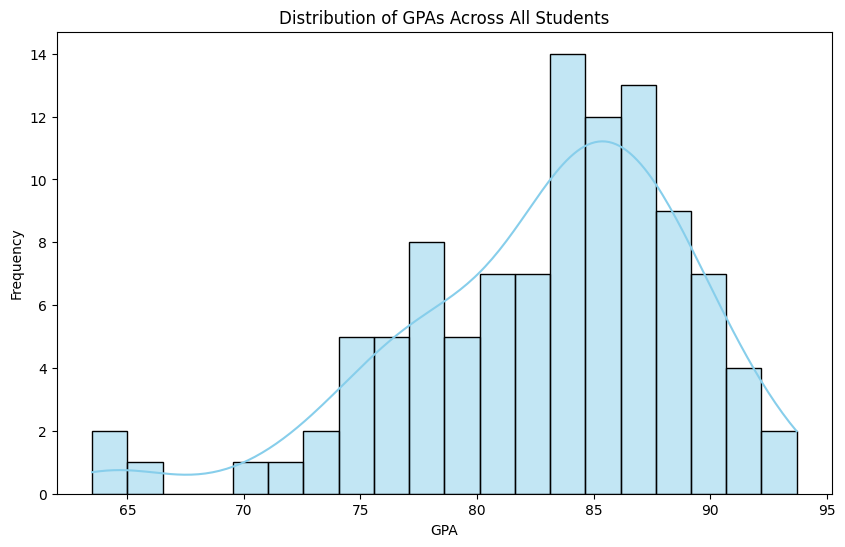

In [44]:

# Plotting the distribution of GPAs across all students
plt.figure(figsize=(10, 6))
sns.histplot(data['GPA'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of GPAs Across All Students')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()


### Analytical Question- 7. Top Performers: Who are the top 10 students in terms of GPA?

In [ ]:
# Sort the data by GPA in descending order and select the top 10 students
top_10_students = data.sort_values(by='GPA', ascending=False).head(10)

# Display the top 10 students
print(top_10_students)

       ID class  gender  race    GPA  Algebra  Calculus1  Calculus2  \
104  1245     A    male     1  93.71       93         97         99   
68   1209     A  female     1  93.06       82         90         93   
75   1216     A  female     1  91.90       95         86         96   
96   1237     A    male     2  91.74       94        100         96   
93   1234     A  female     1  91.61       93         82         95   
97   1238     A    male     1  91.14       98         90         98   
41   1182     B  female     1  90.66       88         78         95   
84   1225     A  female     1  90.62       94         81         90   
98   1239     A    male     1  90.31       84         82         99   
79   1220     A  female     3  89.95       87         87         92   

     Statistics  Probability  Measure  Functional_analysis from1 from2 from3  \
104         100           97       90                   90     K     B     A   
68           91           93       99                   94

### Analytical Question- 8. Course Difficulty: Which courses have the lowest average scores, indicating higher difficulty?

In [ ]:
# Selecting course columns
course_columns = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# Calculate the average scores for each course
average_scores = data[course_columns].mean().sort_values()

# Display the average scores
print(average_scores)

Calculus1              71.961905
Functional_analysis    75.323810
Algebra                76.057143
Calculus2              78.942857
Measure                80.761905
Probability            83.876190
Statistics             85.133333
dtype: float64


### Analytical Question- 9. Impact of From Columns: How do the 'from1', 'from2', 'from3', and 'from4' columns impact the GPA?

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Regression analysis for 'from4'
X = data[['from4']]
y = data['GPA']
X = sm.add_constant(X)
reg_model = sm.OLS(y, X).fit()
reg_summary = reg_model.summary()

# ANOVA for 'from1', 'from2', 'from3'
anova_results = {}
for col in ['from1', 'from2', 'from3']:
    model = ols(f'GPA ~ C({col})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[col] = anova_table

reg_summary, anova_results


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    GPA   R-squared:                       0.003
 Model:                            OLS   Adj. R-squared:                 -0.007
 Method:                 Least Squares   F-statistic:                    0.2832
 Date:                Tue, 04 Jun 2024   Prob (F-statistic):              0.596
 Time:                        00:38:54   Log-Likelihood:                -337.40
 No. Observations:                 105   AIC:                             678.8
 Df Residuals:                     103   BIC:                             684.1
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

### Analytical Question- 10. Predictive Analysis: Can we predict the 'y' value based on GPA and course scores?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize


# Select relevant features and target variable
features = ['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']
X = data[features]
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Check if 'y' is binary or multiclass
if len(data['y'].unique()) == 2:
    y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
else:
    y_test_bin = label_binarize(y_test, classes=data['y'].unique())
    y_pred_prob = log_reg.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

print("ROC-AUC Score:\n", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.20      0.50      0.29         2
           2       0.33      0.25      0.29         4

    accuracy                           0.62        21
   macro avg       0.46      0.49      0.45        21
weighted avg       0.69      0.62      0.64        21

Confusion Matrix:
 [[11  2  2]
 [ 1  1  0]
 [ 1  2  1]]
ROC-AUC Score:
 0.7062206169017315


## Visualization Questions
1. GPA Distribution: Create a histogram showing the distribution of GPAs.
2. Average GPA by Gender: Create a bar chart comparing average GPA between
male and female students.
3. Average GPA by Race: Create a bar chart comparing average GPA across
different races.
4. Course Score Trends: Create line charts for the average scores in Algebra,
Calculus1, Calculus2, Statistics, Probability, Measure, and Functional_analysis.
5. Correlation Heatmap: Create a heatmap to visualize the correlation matrix of
GPA and course scores.
6. Box Plot of GPA by Class: Create a box plot to show the distribution of GPAs
for each class.
7. Scatter Plot of GPA vs. Course Scores: Create scatter plots to show the
relationship between GPA and each course score.
8. Course Difficulty: Create a bar chart to show the average scores of each
course, highlighting the most challenging courses.
9. Impact of 'From' Columns: Create a series of box plots to show the impact of
'from1', 'from2', 'from3', and 'from4' on GPA.


### Visualization Question- 1. GPA Distribution: Create a histogram showing the distribution of GPAs.

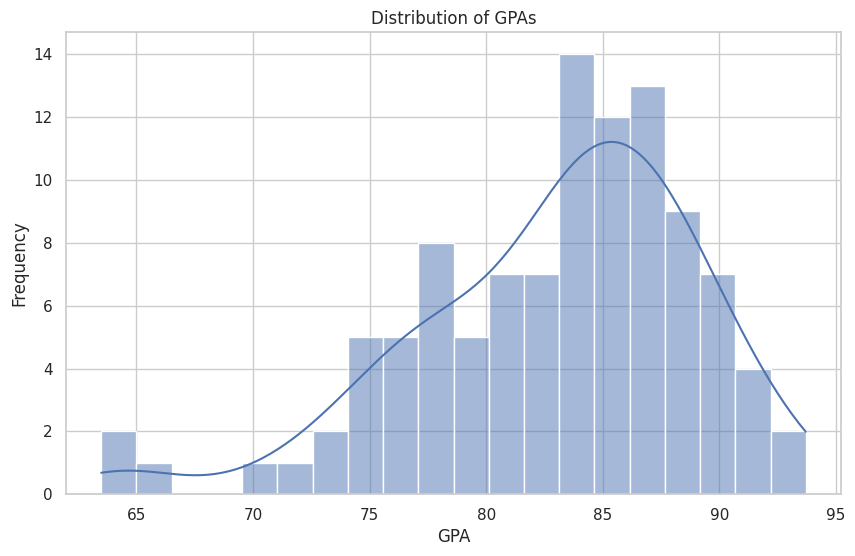

In [46]:
# Set the plot style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['GPA'], bins=20, kde=True)

# Set the title and labels
plt.title('Distribution of GPAs')
plt.xlabel('GPA')
plt.ylabel('Frequency')

# Show plot
plt.show()

### Visualization Question- 2. Average GPA by Gender: Create a bar chart comparing average GPA between male and female students.


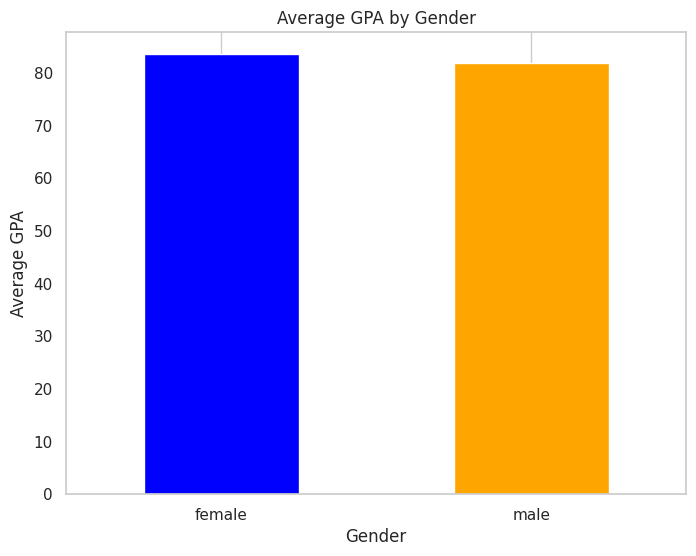

In [47]:
# Create a bar chart for average GPA by gender
plt.figure(figsize=(8, 6))
average_gpa_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Visualization Question- 3. Average GPA by Race: Create a bar chart comparing average GPA across different races.


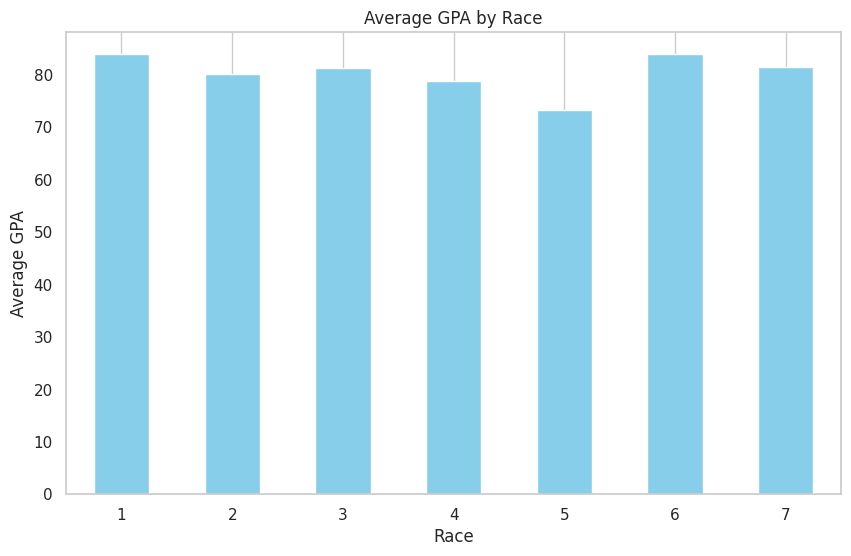

In [48]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_gpa_by_race.plot(kind='bar', color='skyblue')
plt.title('Average GPA by Race')
plt.xlabel('Race')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the bar chart
plt.show()

### Visualization Question- 4. Course Score Trends: Create line charts for the average scores in Algebra, Calculus1, Calculus2, Statistics, Probability, Measure, and Functional_analysis.

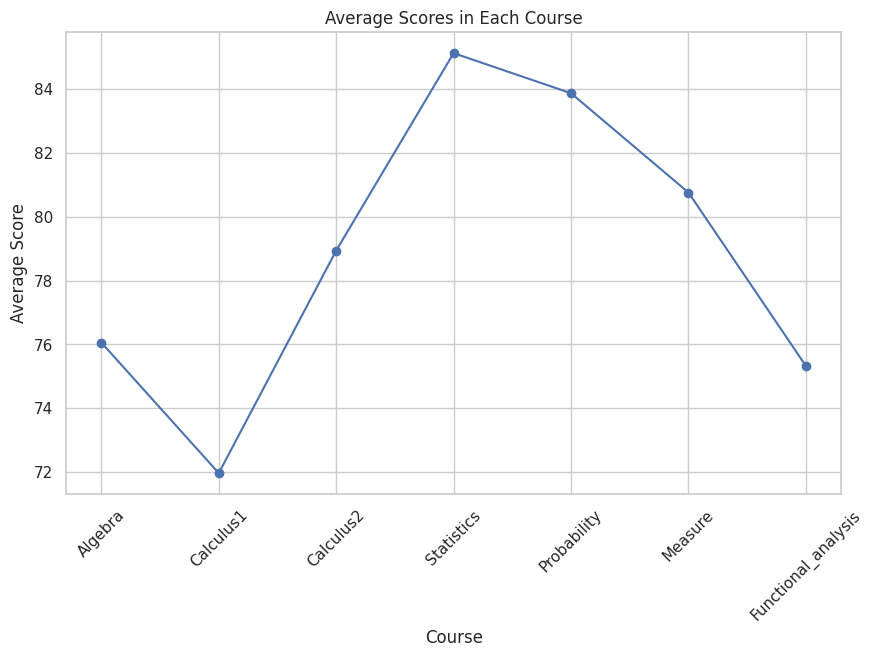

In [50]:
# List of course columns
course_columns = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# Calculate the average scores for each course
average_scores = data[course_columns].mean()

# Create line chart for the average scores
plt.figure(figsize=(10, 6))
average_scores.plot(kind='line', marker='o')
plt.title('Average Scores in Each Course')
plt.xlabel('Course')
plt.ylabel('Average Score')
plt.xticks(ticks=range(len(course_columns)), labels=course_columns, rotation=45)
plt.grid(True)
plt.show()

### Visualization Question- 5. Correlation Heatmap: Create a heatmap to visualize the correlation matrix of GPA and course scores.

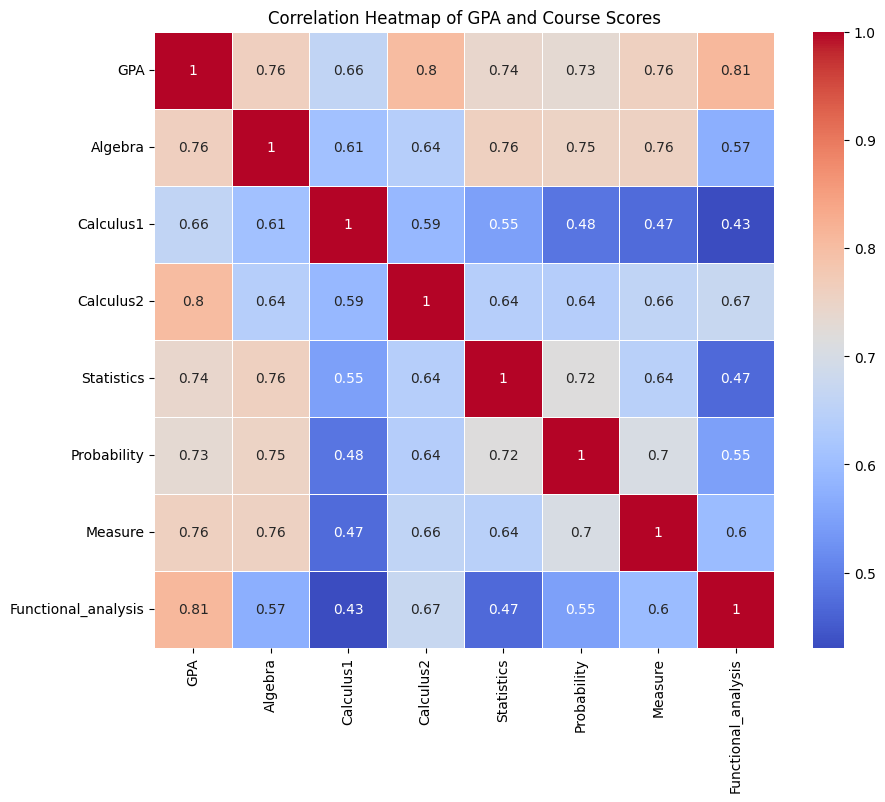

In [ ]:

# Selecting GPA and course scores columns
columns_of_interest = ['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']
data_subset = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of GPA and Course Scores')
plt.show()

### Visualization Question- 6. Box Plot of GPA by Class: Create a box plot to show the distribution of GPAs for each class.

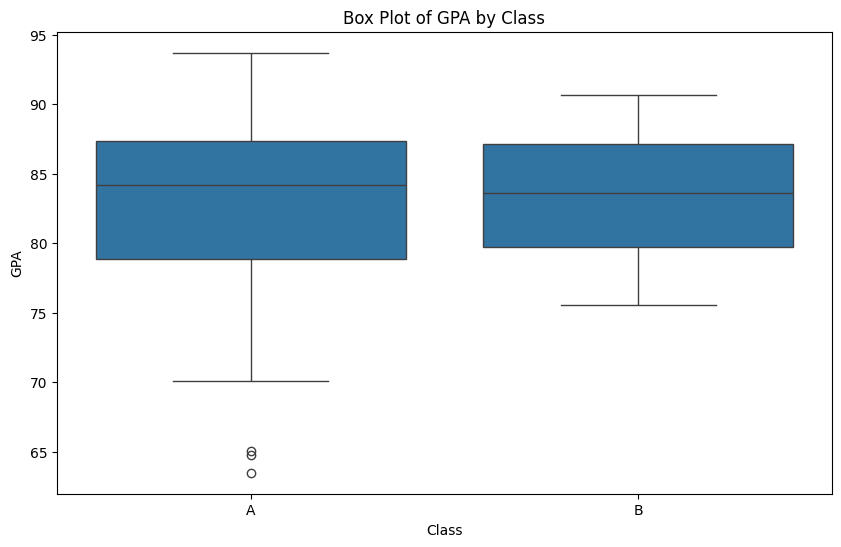

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='GPA', data=data)
plt.title('Box Plot of GPA by Class')
plt.xlabel('Class')
plt.ylabel('GPA')
plt.show()

### Visualization Question- 7. Scatter Plot of GPA vs. Course Scores: Create scatter plots to show the relationship between GPA and each course score.

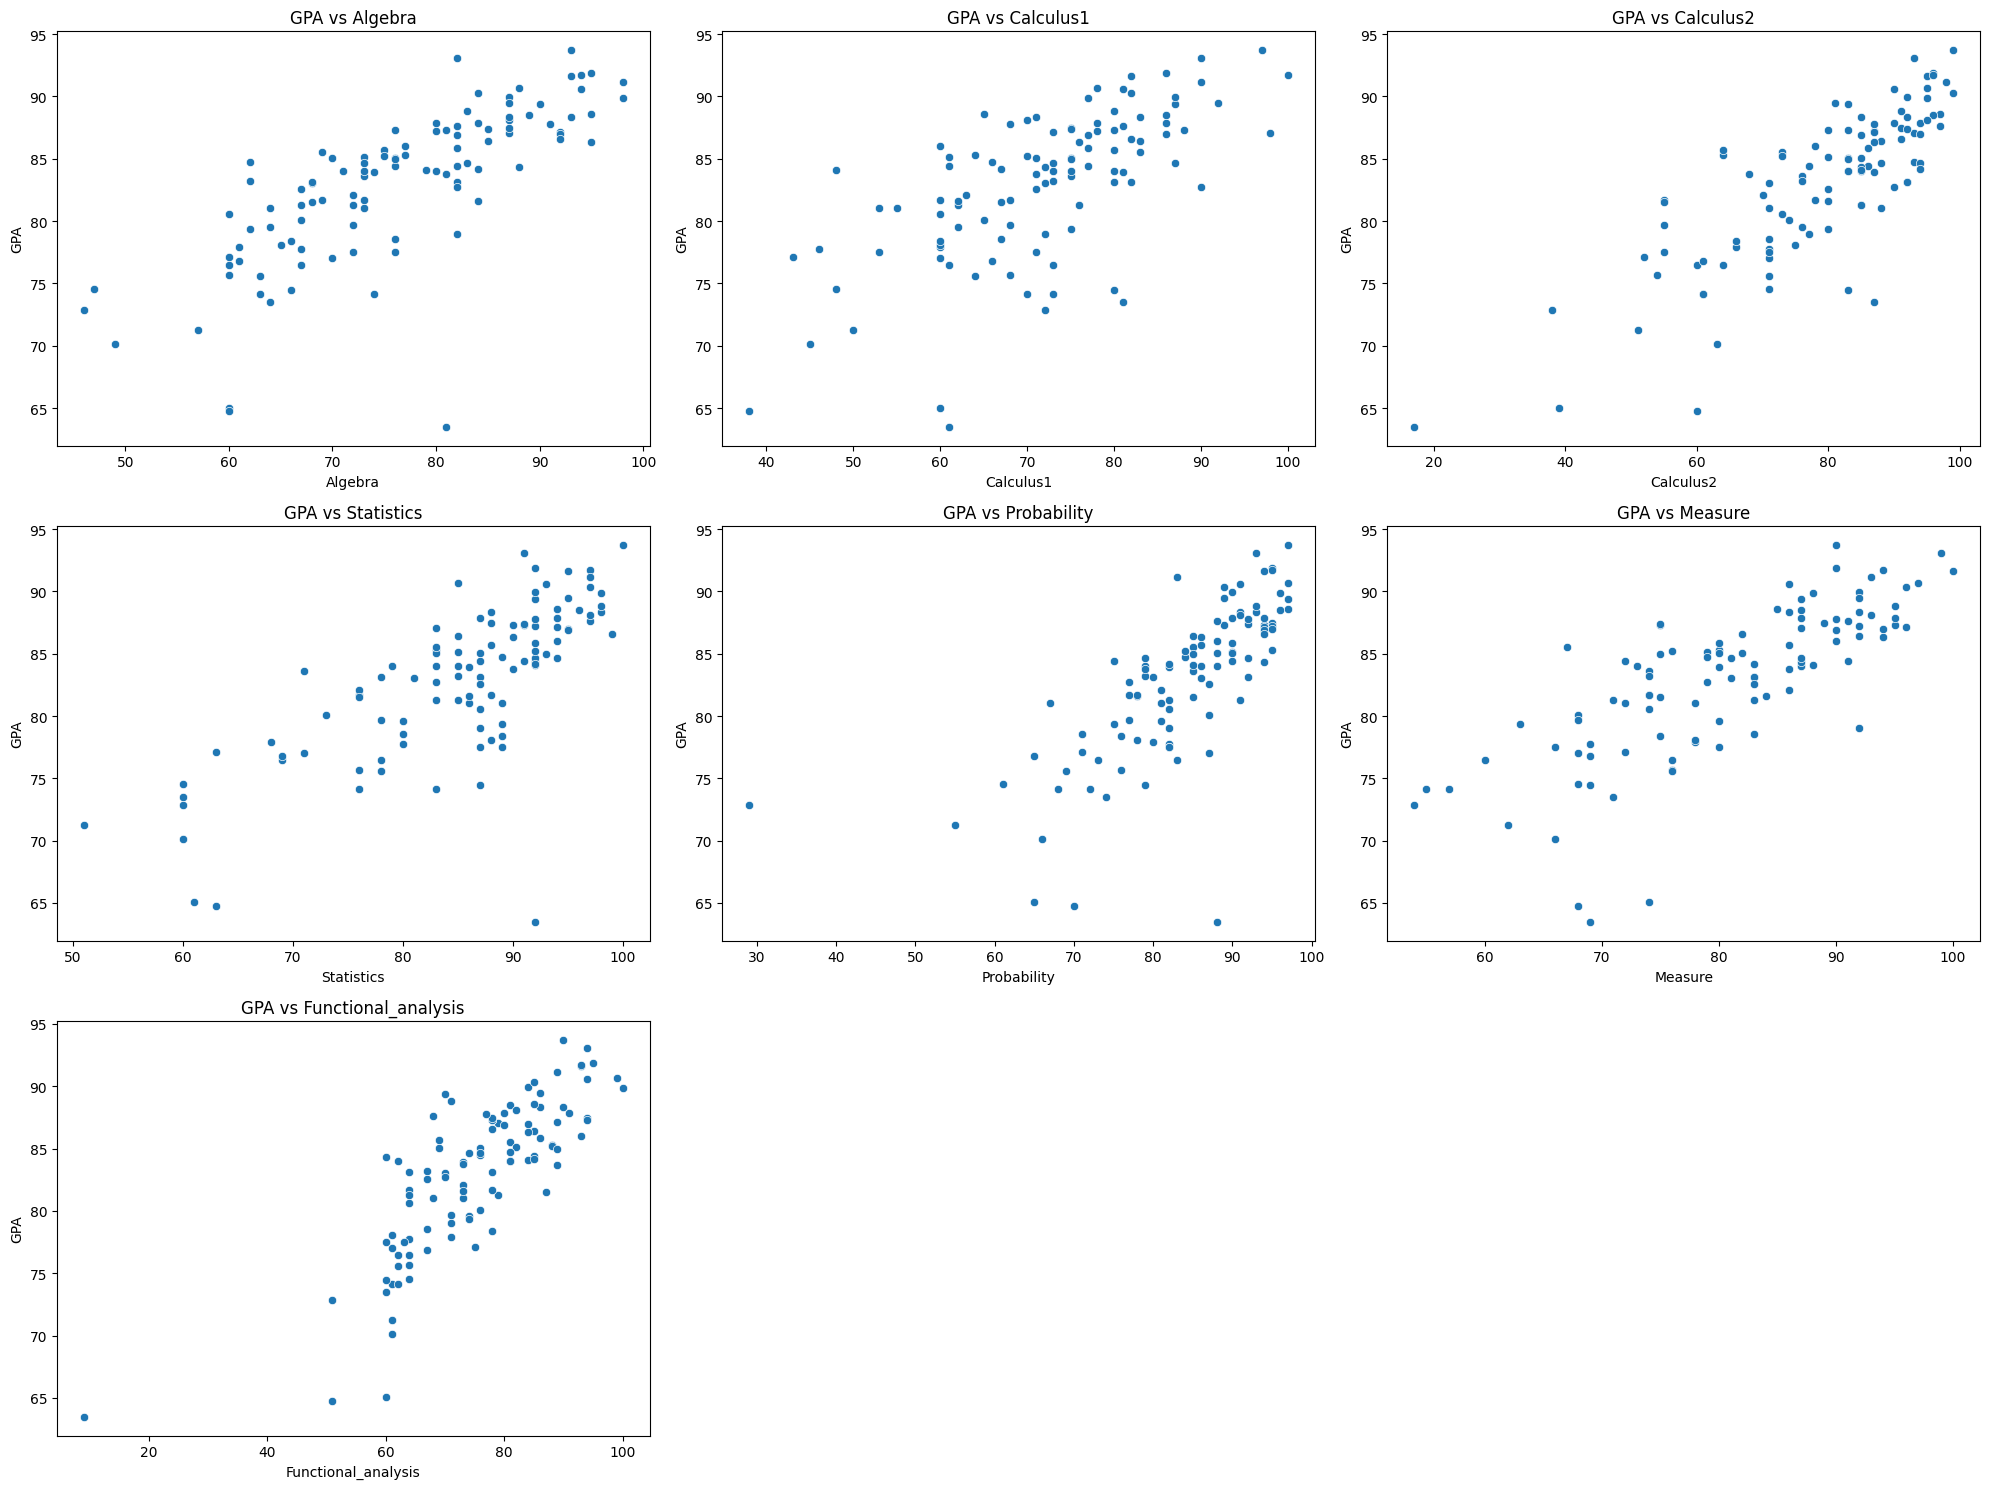

In [ ]:
# List of course columns
course_columns = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# Create scatter plots
plt.figure(figsize=(20, 15))
for i, course in enumerate(course_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data[course], y=data['GPA'])
    plt.title(f'GPA vs {course}')
    plt.xlabel(course)
    plt.ylabel('GPA')

plt.tight_layout()
plt.show()

### Visualization Question- 8. Course Difficulty: Create a bar chart to show the average scores of each course, highlighting the most challenging courses.

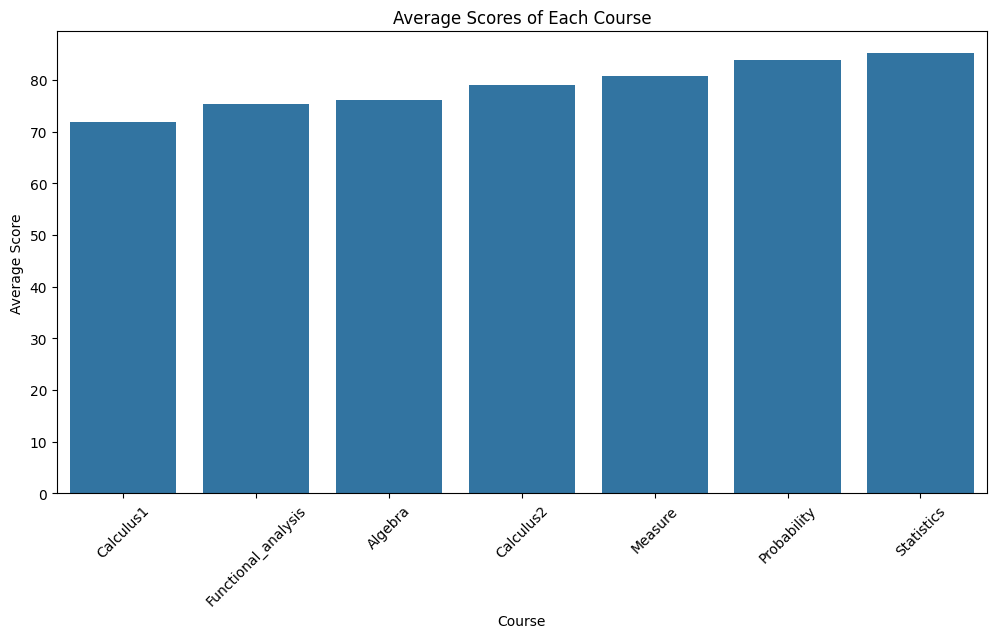

In [ ]:
# Calculate the average scores for each course
average_scores = data[course_columns].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_scores.index, y=average_scores.values)
plt.title('Average Scores of Each Course')
plt.xlabel('Course')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

### Visualization Question- 9. Impact of 'From' Columns: Create a series of box plots to show the impact of 'from1', 'from2', 'from3', and 'from4' on GPA.

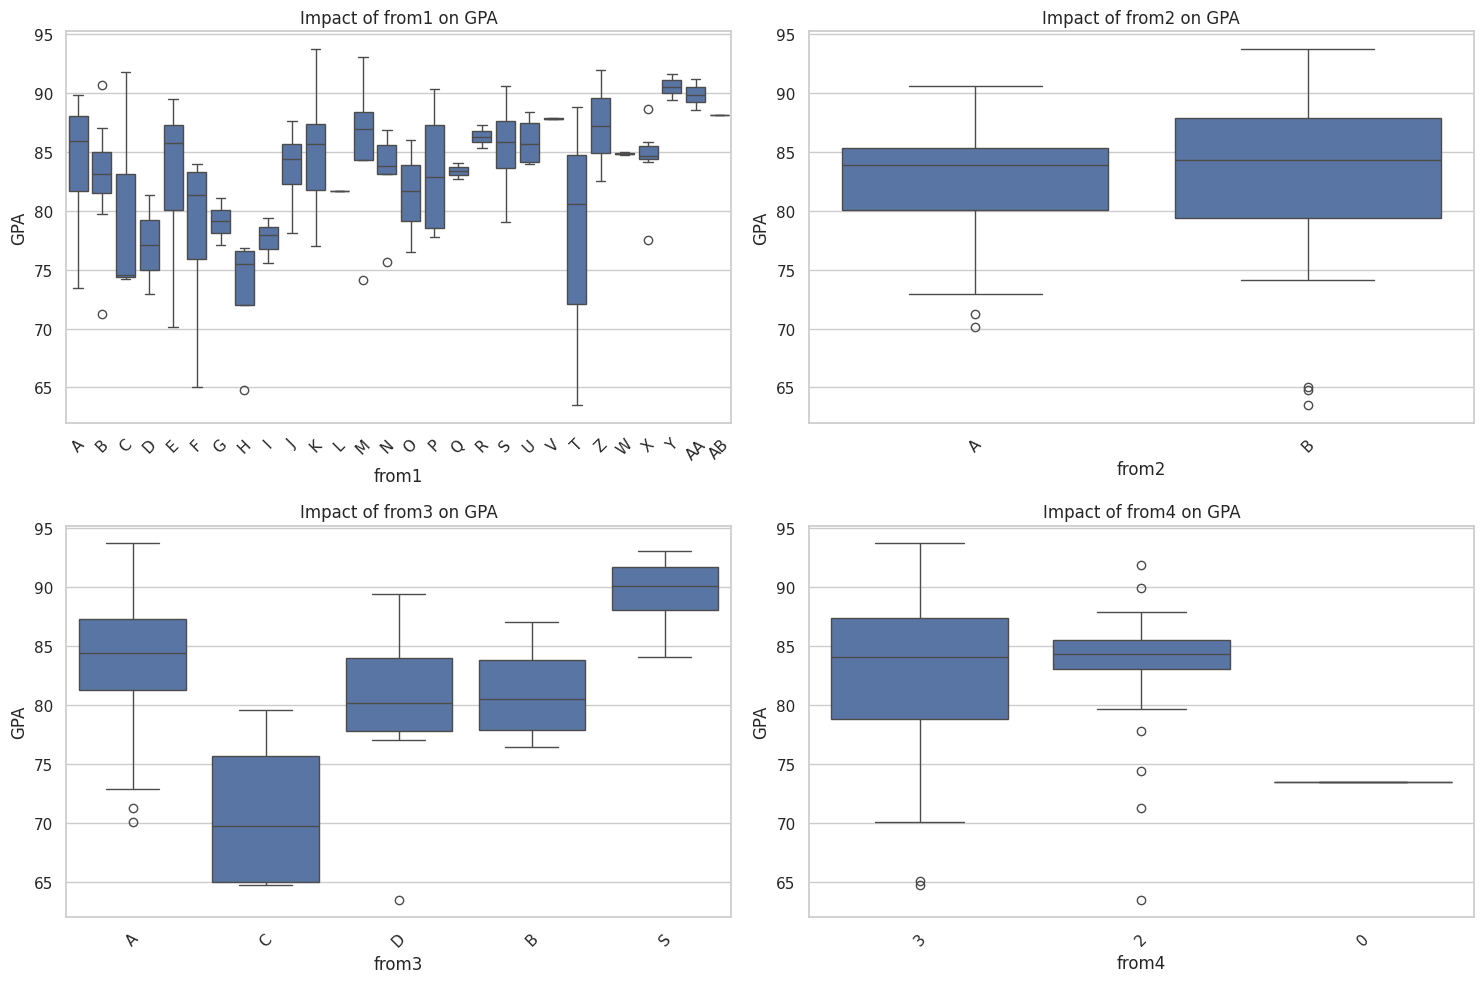

In [ ]:

# Set the plot style
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Create a box plot for 'from1'
sns.boxplot(x='from1', y='GPA', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Impact of from1 on GPA')
axes[0, 0].set_xticks(range(len(data['from1'].unique())))
axes[0, 0].set_xticklabels(data['from1'].unique(), rotation=45)

# Create a box plot for 'from2'
sns.boxplot(x='from2', y='GPA', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Impact of from2 on GPA')
axes[0, 1].set_xticks(range(len(data['from2'].unique())))
axes[0, 1].set_xticklabels(data['from2'].unique(), rotation=45)

# Create a box plot for 'from3'
sns.boxplot(x='from3', y='GPA', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Impact of from3 on GPA')
axes[1, 0].set_xticks(range(len(data['from3'].unique())))
axes[1, 0].set_xticklabels(data['from3'].unique(), rotation=45)

# Create a box plot for 'from4'
sns.boxplot(x='from4', y='GPA', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Impact of from4 on GPA')
axes[1, 1].set_xticks(range(len(data['from4'].unique())))
axes[1, 1].set_xticklabels(data['from4'].unique(), rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
